# 基本的な画像データの取り込み方

In [1]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/MyStudy/dlwpt-code-ja/p1ch4

Mounted at /content/drive
/content/drive/MyDrive/MyStudy/dlwpt-code-ja/p1ch4


In [ ]:
import torch
import numpy as np
torch.set_printoptions(edgeitems=2, threshold=50)

In [ ]:
import imageio
img_arr = imageio.imread('../data/p1ch4/image-dog/bobby.jpg')
img_arr.shape

<ipython-input-4-0f5b9c2acffe>:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_arr = imageio.imread('../data/p1ch4/image-dog/bobby.jpg')


(720, 1280, 3)

In [ ]:
type(img_arr)

imageio.core.util.Array

In [ ]:
img = torch.from_numpy(img_arr)
out = img.permute(2, 0, 1)

In [ ]:
id(img.untyped_storage()) == id(out.untyped_storage())

True

In [ ]:
batch_size = 3
batch = torch.zeros(batch_size, 3, 256, 256, dtype=torch.uint8)

In [ ]:
import os

data_dir = '../data/p1ch4/image-cats/'
filename = [name for name in os.listdir(data_dir) if os.path.splitext(name)[-1] == '.png']
for i, fn in enumerate(filename):
    img_arr = imageio.imread(os.path.join(data_dir, fn))
    img_t = torch.from_numpy(img_arr)
    img_t = img_t.permute(2, 0, 1)
    img_t = img_t[:3] # アルファ値の削除
    print('画像サイズ:{}'.format(img_t.shape))
    batch[i] = img_t

<ipython-input-39-da4b0a822fe6>:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_arr = imageio.imread(os.path.join(data_dir, fn))


画像サイズ:torch.Size([3, 256, 256])
画像サイズ:torch.Size([3, 256, 256])
画像サイズ:torch.Size([3, 256, 256])


In [ ]:
batch = batch.float()
batch /= 255.0

In [ ]:
n_channels = batch.shape[1]
for c in range(n_channels):
    mean = torch.mean(batch[:, c])
    std = torch.std(batch[:, c])
    batch[:, c] = (batch[:, c] - mean) / std

# CT画像

In [ ]:
import numpy as np
import torch
torch.set_printoptions(edgeitems=2, threshold=50)

In [ ]:
import imageio

dir_path = '../data/p1ch4/volumetric-dicom/2-LUNG 3.0  B70f-04083'
vol_arr = imageio.volread(dir_path, 'DICOM')
vol_arr.shape

Reading DICOM (examining files): 1/99 files (1.0%)2/99 files (2.0%)3/99 files (3.0%)4/99 files (4.0%)5/99 files (5.1%)6/99 files (6.1%)7/99 files (7.1%)8/99 files (8.1%)9/99 files (9.1%)10/99 files (10.1%)11/99 files (11.1%)12/99 files (12.1%)13/99 files (13.1%)14/99 files (14.1%)15/99 files (15.2%)16/99 files (16.2%)17/99 files (17.2%)18/99 files (18.2%)19/99 files (19.2%)20/99 files (20.2%)21/99 files (21.2%)22/99 files (22.2%)23/99 files (23.2%)24/99 files (24.2%)25/99 files (25.3%)26/99 files (26.3%)27/99 files (27

(99, 512, 512)

In [ ]:
vol = torch.from_numpy(vol_arr).float()
# チャネルの次元を追加
vol = torch.unsqueeze(vol, 0)

vol.shape

torch.Size([1, 99, 512, 512])

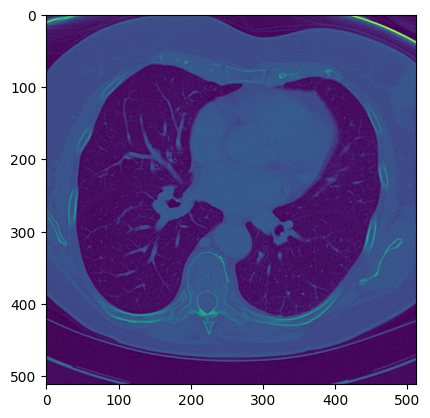

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(vol_arr[50])

# 表形式データ
## ワインの品質データ

In [ ]:
import csv

wine_path = '../data/p1ch4/tabular-wine/winequality-white.csv'

wineq_numpy = np.loadtxt(wine_path, dtype=np.float32, delimiter=';', skiprows=1)
wineq_numpy

array([[ 7.  ,  0.27,  0.36, ...,  0.45,  8.8 ,  6.  ],
       [ 6.3 ,  0.3 ,  0.34, ...,  0.49,  9.5 ,  6.  ],
       [ 8.1 ,  0.28,  0.4 , ...,  0.44, 10.1 ,  6.  ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  0.46,  9.4 ,  6.  ],
       [ 5.5 ,  0.29,  0.3 , ...,  0.38, 12.8 ,  7.  ],
       [ 6.  ,  0.21,  0.38, ...,  0.32, 11.8 ,  6.  ]], dtype=float32)

In [ ]:
col_list = next(csv.reader(open(wine_path), delimiter=';'))
wineq_numpy.shape, col_list

((4898, 12),
 ['fixed acidity',
  'volatile acidity',
  'citric acid',
  'residual sugar',
  'chlorides',
  'free sulfur dioxide',
  'total sulfur dioxide',
  'density',
  'pH',
  'sulphates',
  'alcohol',
  'quality'])

In [ ]:
wineq = torch.from_numpy(wineq_numpy)
wineq.shape, wineq.dtype

(torch.Size([4898, 12]), torch.float32)

In [ ]:
data = wineq[:, :-1]
data, data.shape

(tensor([[ 7.0000,  0.2700,  ...,  0.4500,  8.8000],
         [ 6.3000,  0.3000,  ...,  0.4900,  9.5000],
         ...,
         [ 5.5000,  0.2900,  ...,  0.3800, 12.8000],
         [ 6.0000,  0.2100,  ...,  0.3200, 11.8000]]),
 torch.Size([4898, 11]))

In [ ]:
target = wineq[:, -1]
target, target.shape

(tensor([6., 6.,  ..., 7., 6.]), torch.Size([4898]))

In [ ]:
# 品質スコアを整数値として扱う場合
target = wineq[:, -1].long()
target

tensor([6, 6,  ..., 7, 6])

In [ ]:
# ワンホットエンコードする場合
## 次元数を揃える
target_onehot = torch.zeros(target.shape[0], 10)
target_onehot.scatter_(1, target.unsqueeze(1), 1.0)
target_onehot

tensor([[0., 0.,  ..., 0., 0.],
        [0., 0.,  ..., 0., 0.],
        ...,
        [0., 0.,  ..., 0., 0.],
        [0., 0.,  ..., 0., 0.]])

In [ ]:
target_unsqueezed = target.unsqueeze(1)
target_unsqueezed

tensor([[6],
        [6],
        ...,
        [7],
        [6]])

In [ ]:
data_mean = torch.mean(data, dim=0)
data_mean, data_mean.shape

(tensor([6.8548e+00, 2.7824e-01, 3.3419e-01, 6.3914e+00, 4.5772e-02, 3.5308e+01,
         1.3836e+02, 9.9403e-01, 3.1883e+00, 4.8985e-01, 1.0514e+01]),
 torch.Size([11]))

In [ ]:
# torch.var() 不偏分散
data_var = torch.var(data, dim=0)
data_var, data_var.shape

(tensor([7.1211e-01, 1.0160e-02, 1.4646e-02, 2.5726e+01, 4.7733e-04, 2.8924e+02,
         1.8061e+03, 8.9455e-06, 2.2801e-02, 1.3025e-02, 1.5144e+00]),
 torch.Size([11]))

In [ ]:
data_normalized = (data - data_mean) / torch.sqrt(data_var)
data_normalized, data_normalized.shape

(tensor([[ 1.7208e-01, -8.1761e-02,  ..., -3.4915e-01, -1.3930e+00],
         [-6.5743e-01,  2.1587e-01,  ...,  1.3422e-03, -8.2419e-01],
         ...,
         [-1.6054e+00,  1.1666e-01,  ..., -9.6251e-01,  1.8574e+00],
         [-1.0129e+00, -6.7703e-01,  ..., -1.4882e+00,  1.0448e+00]]),
 torch.Size([4898, 11]))

In [ ]:
bad_indices = target <= 3
bad_indices.shape, bad_indices.dtype, bad_indices.sum()

(torch.Size([4898]), torch.bool, tensor(20))

In [ ]:
bad_data = data[bad_indices]
bad_data.shape

torch.Size([20, 11])

In [ ]:
bad_data = data[target <= 3]
mid_data = data[(target > 3) & (target < 7)]
good_data = data[target >= 7]

bad_mean = torch.mean(bad_data, dim=0)
mid_mean = torch.mean(mid_data, dim=0)
good_mean = torch.mean(good_data, dim=0)

print('{: >30} {: >6} {: >6}'.format('bad', 'mid', 'good'))
for i, args in enumerate(zip(col_list, bad_mean, mid_mean, good_mean)):
    print('{:2} {:20} {:6.2f} {:6.2f} {:6.2f}'.format(i, *args))

                           bad    mid   good
 0 fixed acidity          7.60   6.89   6.73
 1 volatile acidity       0.33   0.28   0.27
 2 citric acid            0.34   0.34   0.33
 3 residual sugar         6.39   6.71   5.26
 4 chlorides              0.05   0.05   0.04
 5 free sulfur dioxide   53.33  35.42  34.55
 6 total sulfur dioxide 170.60 141.83 125.25
 7 density                0.99   0.99   0.99
 8 pH                     3.19   3.18   3.22
 9 sulphates              0.47   0.49   0.50
10 alcohol               10.34  10.26  11.42


In [ ]:
total_sulfur_threshold = 141.83
total_sulfur_data = data[:, 6]
predicted_indices = torch.lt(total_sulfur_data, total_sulfur_threshold) #less_than
predicted_indices.shape, predicted_indices.dtype, predicted_indices.sum()

(torch.Size([4898]), torch.bool, tensor(2727))

In [ ]:
torch.sum(total_sulfur_data<total_sulfur_threshold)

tensor(2727)

In [ ]:
torch.tensor(4898) - torch.sum(total_sulfur_data<total_sulfur_threshold)

tensor(2171)

In [ ]:
actual_indices = target > 5
actual_indices.shape, actual_indices.dtype, actual_indices.sum()

(torch.Size([4898]), torch.bool, tensor(3258))

In [ ]:
# 予測と実値でマッチしているインデックス数
n_matches = torch.sum(actual_indices & ~predicted_indices).item()
n_matches

1240

In [ ]:
n_predicted = torch.sum(~predicted_indices).item()
n_actual = torch.sum(actual_indices).item()
n_matches / n_predicted, n_matches / n_actual

(0.5711653615845232, 0.38060159607120936)

# 時系列データ

In [2]:
import numpy as np
import torch
torch.set_printoptions(edgeitems=2, threshold=50, linewidth=75)

In [6]:
bikes_numpy = np.loadtxt(
    '../data/p1ch4/bike-sharing-dataset/hour-fixed.csv',
    dtype=np.float32,
    delimiter=',',
    skiprows=1,
    converters={1: lambda x: float(x[8:10])} # 日付部分だけ抽出
)

bikes = torch.from_numpy(bikes_numpy)
bikes

tensor([[1.0000e+00, 1.0000e+00,  ..., 1.3000e+01, 1.6000e+01],
        [2.0000e+00, 1.0000e+00,  ..., 3.2000e+01, 4.0000e+01],
        ...,
        [1.7378e+04, 3.1000e+01,  ..., 4.8000e+01, 6.1000e+01],
        [1.7379e+04, 3.1000e+01,  ..., 3.7000e+01, 4.9000e+01]])

In [7]:
bikes.shape, bikes.stride()

(torch.Size([17520, 17]), (17, 1))

In [8]:
daily_bikes = bikes.view(-1, 24, bikes.shape[1])
daily_bikes.shape, daily_bikes.stride()

(torch.Size([730, 24, 17]), (408, 17, 1))

In [9]:
daily_bikes = daily_bikes.transpose(1, 2)
daily_bikes.shape, daily_bikes.stride()

(torch.Size([730, 17, 24]), (408, 1, 17))

In [10]:
first_day = bikes[:24].long()
weather_onehot = torch.zeros(first_day.shape[0], 4)
first_day[:, 9]

tensor([1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 2, 2,
        2, 2])

In [12]:
weather_onehot.scatter_(dim=1,
                        index=first_day[:, 9].unsqueeze(1).long() - 1,
                        value=1.0)
weather_onehot

tensor([[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        ...,
        [0., 1., 0., 0.],
        [0., 1., 0., 0.]])

In [13]:
torch.cat((bikes[:24], weather_onehot), 1)[:1]

tensor([[ 1.0000,  1.0000,  1.0000,  0.0000,  1.0000,  0.0000,  0.0000,
          6.0000,  0.0000,  1.0000,  0.2400,  0.2879,  0.8100,  0.0000,
          3.0000, 13.0000, 16.0000,  1.0000,  0.0000,  0.0000,  0.0000]])

In [16]:
daily_weather_onehot = torch.zeros(daily_bikes.shape[0], 4, daily_bikes.shape[2])
daily_weather_onehot.scatter_(
    1, daily_bikes[:, 9, :].long().unsqueeze(1)-1, 1.0
)
daily_weather_onehot.shape

torch.Size([730, 4, 24])

In [17]:
daily_bikes = torch.cat((daily_bikes, daily_weather_onehot), dim=1)

In [18]:
daily_bikes[:, 9, :] = (daily_bikes[:, 9, :] - 1) / 3.0

In [19]:
temp = daily_bikes[:, 10, :]
temp_min = torch.min(temp)
temp_max = torch.max(temp)
temp_min, temp_max

(tensor(0.0200), tensor(1.))

In [21]:
daily_bikes[:, 10, :] = ((daily_bikes[:, 10, :] - temp_min) / (temp_max - temp_min))

# テキストデータ

In [22]:
import numpy as np
import torch
torch.set_printoptions(edgeitems=2, threshold=50)

In [23]:
with open('../data/p1ch4/jane-austen/1342-0.txt', encoding='utf8') as f:
    text = f.read()
text

"\ufeffThe Project Gutenberg EBook of Pride and Prejudice, by Jane Austen\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org\n\n\nTitle: Pride and Prejudice\n\nAuthor: Jane Austen\n\nPosting Date: August 26, 2008 [EBook #1342]\nRelease Date: June, 1998\nLast Updated: March 10, 2018\n\nLanguage: English\n\nCharacter set encoding: UTF-8\n\n*** START OF THIS PROJECT GUTENBERG EBOOK PRIDE AND PREJUDICE ***\n\n\n\n\nProduced by Anonymous Volunteers\n\n\n\n\n\nPRIDE AND PREJUDICE\n\nBy Jane Austen\n\n\n\nChapter 1\n\n\nIt is a truth universally acknowledged, that a single man in possession\nof a good fortune, must be in want of a wife.\n\nHowever little known the feelings or views of such a man may be on his\nfirst entering a neighbourhood, this truth is so well fixed in the minds\nof the su

In [25]:
lines = text.split('\n')
line = lines[200]
line

'“Impossible, Mr. Bennet, impossible, when I am not acquainted with him'

In [27]:
letter_t = torch.zeros(len(line), 128)
letter_t.shape

torch.Size([70, 128])

In [31]:
for i, letter in enumerate(line.lower().strip()):
    letter_index = ord(letter) if ord(letter) < 128 else 0
    letter_t[i, letter_index] = 1.0

In [43]:
def clean_words(input_str):
    punctuation = '.,;:"!?”“_-'
    word_list = input_str.lower().replace('\n', ' ').split()
    word_list = [word.strip(punctuation) for word in word_list]
    return word_list

words_in_line = clean_words(line)
line, words_in_line

('“Impossible, Mr. Bennet, impossible, when I am not acquainted with him',
 ['impossible',
  'mr',
  'bennet',
  'impossible',
  'when',
  'i',
  'am',
  'not',
  'acquainted',
  'with',
  'him'])

In [45]:
words_in_line

['impossible',
 'mr',
 'bennet',
 'impossible',
 'when',
 'i',
 'am',
 'not',
 'acquainted',
 'with',
 'him']

In [44]:
word_list = sorted(set(clean_words(text)))
word2index_dict = {word: i for (i, word) in enumerate(word_list)}

len(word2index_dict), word2index_dict['impossible']

(7261, 3394)

In [47]:
word_t = torch.zeros(len(words_in_line), len(word2index_dict))
for i, word in enumerate(words_in_line):
    word_index = word2index_dict[word]
    word_t[i, word_index] = 1
    print('{:2} {:4} {}'.format(i, word_index, word))

print(word_t.shape)

 0 3394 impossible
 1 4305 mr
 2  813 bennet
 3 3394 impossible
 4 7078 when
 5 3315 i
 6  415 am
 7 4436 not
 8  239 acquainted
 9 7148 with
10 3215 him
torch.Size([11, 7261])
